## References

* HAT-P-14 b [(Fukui+16a))](http://iopscience.iop.org/article/10.3847/0004-637X/819/1/27/pdf)
* K2-3d [(Fukui+16b)](http://iopscience.iop.org/article/10.3847/0004-6256/152/6/171) 

In [2]:
!python --version

Python 3.6.1 :: Continuum Analytics, Inc.


In [3]:
import os
os.environ['CONDA_DEFAULT_ENV']

'moscatel'

## import and parse csv

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#import multiprocessing

bands='g,r,z_s'.split(',')
nstars=3


DF = {} #dict of dataframes
for band in bands:
    DF[band]=[]
    for band_idx,star_id in enumerate(range(nstars)):
        fname='data/phot_{0}band_star{1}.csv'.format(band,star_id)
        df = pd.read_csv(fname, parse_dates=True)
        df = df.set_index('mjd')
        DF[band].append(df)

In [5]:
DF.keys()

dict_keys(['g', 'r', 'z_s'])

## 3 bands one star

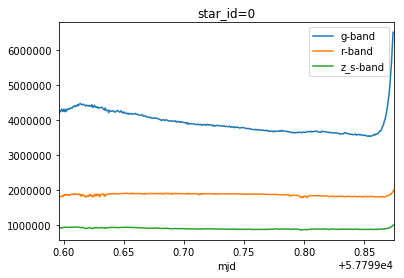

In [6]:
star_id=0

param='aperture_sum_1'
for key in DF.keys():
    title='star_id={}'.format(star_id)
    label='{}-band'.format(key)
    DF[key][star_id][param].plot(label=label, title=title)
plt.legend()

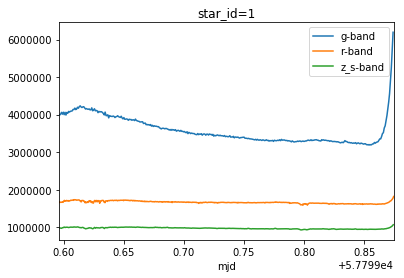

In [7]:
star_id=1

param='aperture_sum_1'
for key in DF.keys():
    title='star_id={}'.format(star_id)
    label='{}-band'.format(key)
    DF[key][star_id][param].plot(label=label, title=title)
plt.legend()

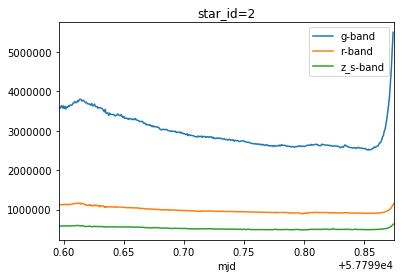

In [8]:
star_id=2

param='aperture_sum_1'
for key in DF.keys():
    title='star_id={}'.format(star_id)
    label='{}-band'.format(key)
    DF[key][star_id][param].plot(label=label, title=title)
plt.legend()

## 3 stars one band

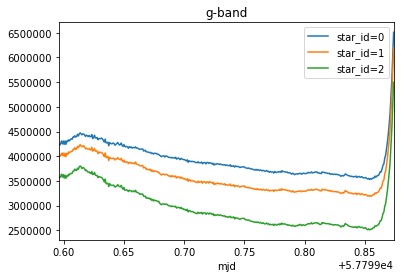

In [9]:
key='g'

param='aperture_sum_1'
for star_id in range(nstars):
    label='star_id={}'.format(star_id)
    title='{}-band'.format(key)
    DF[key][star_id][param].plot(label=label, title=title)
plt.legend()

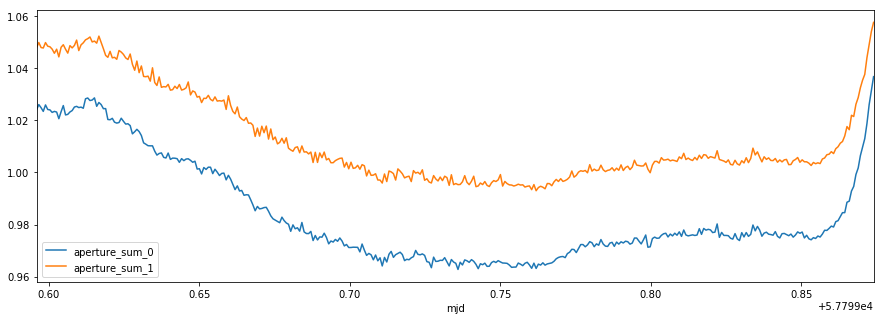

In [10]:
key='g'
param='aperture_sum_0,aperture_sum_1'.split(',')

t=DF[key][0].index
target=DF[key][1][param]
ref=DF[key][0][param]
res=target/ref
res/=np.median(res)

res.plot(figsize=(15,5))

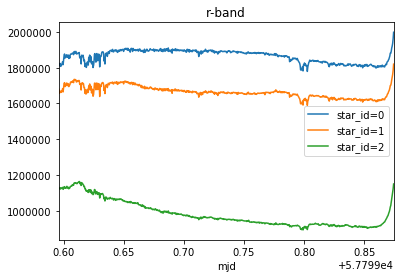

In [11]:
key='r'

param='aperture_sum_1'
for star_id in range(nstars):
    label='star_id={}'.format(star_id)
    title='{}-band'.format(key)
    DF[key][star_id][param].plot(label=label, title=title)
plt.legend()

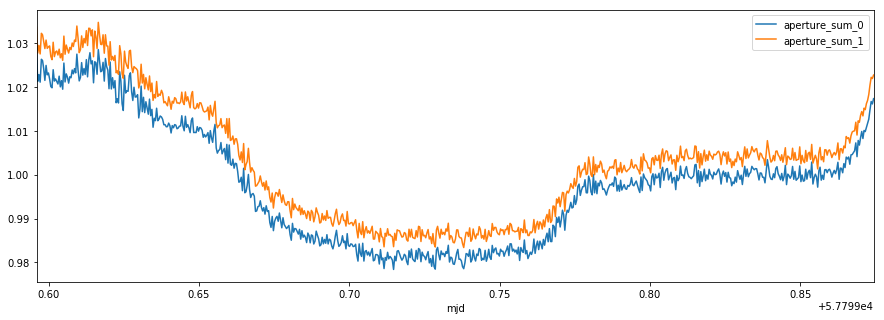

In [12]:
key='r'
param='aperture_sum_0,aperture_sum_1'.split(',')


t=DF[key][0].index
target=DF[key][1][param]
ref=DF[key][0][param]
res=target/ref
res/=np.median(res)

res.plot(figsize=(15,5))

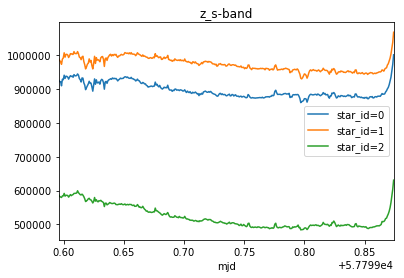

In [13]:
key='z_s'

param='aperture_sum_1'
for star_id in range(nstars):
    label='star_id={}'.format(star_id)
    title='{}-band'.format(key)
    DF[key][star_id][param].plot(label=label, title=title)
plt.legend()

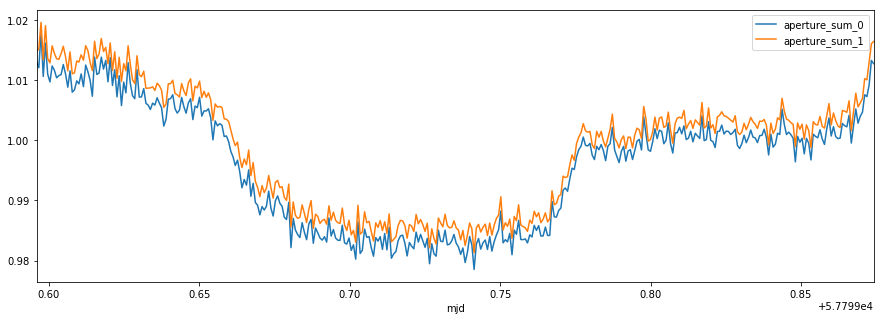

In [14]:
key='z_s'
param='aperture_sum_0,aperture_sum_1'.split(',')

t=DF[key][0].index
target=DF[key][0][param]
ref=DF[key][1][param]
res=target/ref
res/=np.median(res)

res.plot(figsize=(15,5))

## centroids

In [15]:
DF[key][star_id].columns

Index(['aperture_sum_0', 'aperture_sum_1', 'aperture_sum_err_0',
       'aperture_sum_err_1', 'bkg', 'fwhm', 'id', 'peak_flux', 'uncertainty',
       'xcenter', 'ycenter'],
      dtype='object')

## fwhm

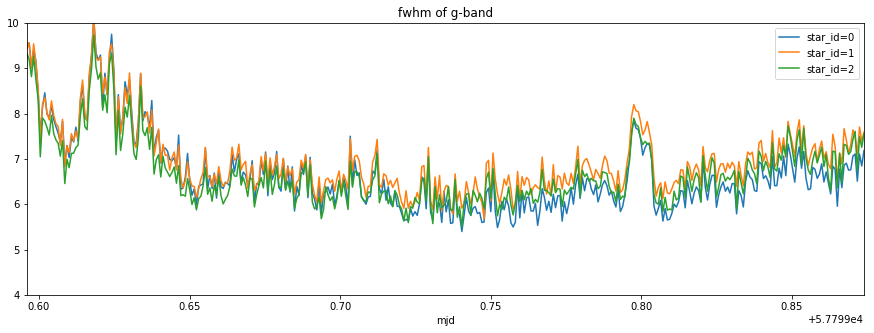

In [16]:
key='g'
param='fwhm'

for star_id in range(nstars):
    label='star_id={}'.format(star_id)
    title='fwhm of {}-band'.format(key)
    DF[key][star_id][param].plot(label=label, title=title, ylim=(4,10), figsize=(15,5))
plt.legend()

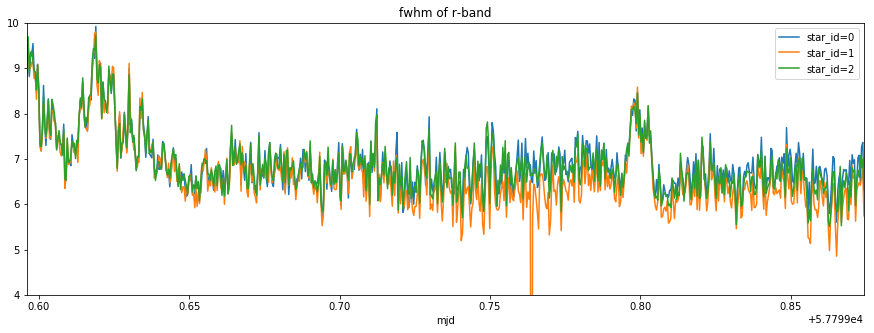

In [17]:
key='r'
param='fwhm'

for star_id in range(nstars):
    label='star_id={}'.format(star_id)
    title='fwhm of {}-band'.format(key)
    DF[key][star_id][param].plot(label=label, title=title, ylim=(4,10), figsize=(15,5))
plt.legend()

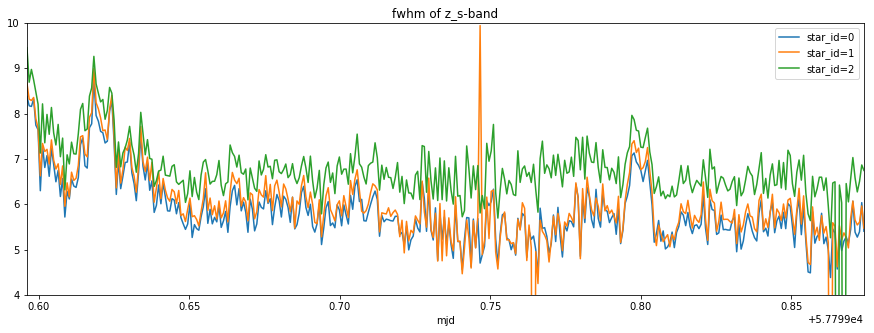

In [18]:
key='z_s'
param='fwhm'

for star_id in range(nstars):
    label='star_id={}'.format(star_id)
    title='fwhm of {}-band'.format(key)
    DF[key][star_id][param].plot(label=label, title=title, ylim=(4,10), figsize=(15,5))
plt.legend()

## best light curve

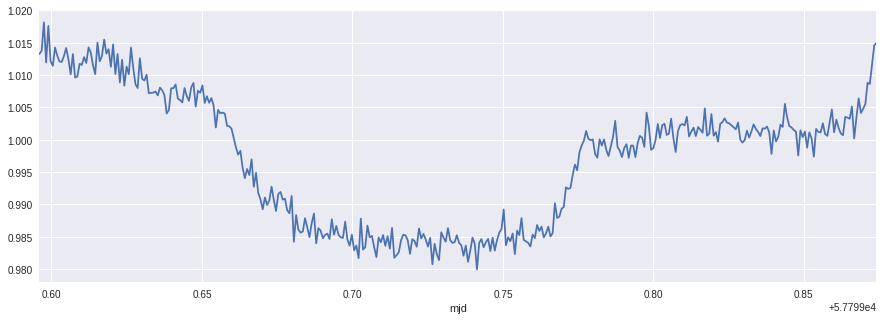

In [59]:
key='z_s'
param='aperture_sum_1'

target=DF[key][0][param]
ref=DF[key][1][param]
res=target/ref
res/=np.median(res)

res.plot(figsize=(15,5))


t=DF[key][0].index.values
f=res.values

## MLE

In [22]:
def scaled_a(p, t14, k, i=np.pi/2, b=0):
    numer = np.sqrt( (k + 1)**2 - b**2 )
    denom = np.sin(i) * np.sin(t14 * np.pi / p)
    return float(numer / denom)

tc = t.mean()
p = 4.3
k = np.sqrt(0.015)
i = np.pi/2
t14 = 2.8/24
u1 = 0.4
u2 = 0.4
a = scaled_a(p, t14, k, i=np.pi/2)
# ls = np.log(f.std())
# k0 = 0
# theta = [k,tc,a,i,u1,u2,ls,k0]
theta = [k,tc,a,i,u1,u2]
print ("initial guess: {}".format(theta))

initial guess: [0.1224744871391589, 57799.735050636424, 13.18482235546915, 1.5707963267948966, 0.4, 0.4]


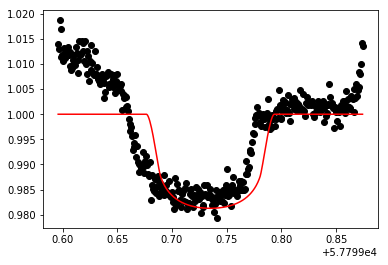

In [23]:
from pytransit import MandelAgol
MA = MandelAgol()

def model_u(theta, t, p):
    k,tc,a,i,u1,u2 = theta
    m = MA.evaluate(t, k, (u1, u2), tc, p, a, i)
    return m

plt.plot(t, f, 'ko', t, model_u(theta, t, p), 'r-')

In [24]:
import scipy.optimize as op

def obj(theta, t, p, f):
    m = model_u(theta, t, p)
    return np.sum((m-f)**2)

print ("cost before: {}".format(obj(theta, t, p, f)))
res = op.minimize(obj, theta, args=(t, p, f), method='nelder-mead')
print ("cost after: {}".format(obj(res.x, t, p, f)))

cost before: 0.015367414838116308
cost after: 0.011136645852445316


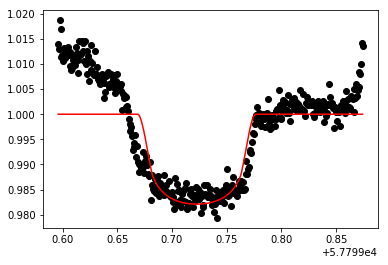

In [25]:
plt.plot(t, f, 'ko', t, model_u(res.x, t, p), 'r-')

In [29]:
xcenter = DF[key][0]['xcenter']
ycenter = DF[key][0]['ycenter']

#fwhm = xcenter*ycenter
fwhm = DF[key][0]['fwhm']

In [30]:
np.c_[fwhm, xcenter, ycenter].shape

(376, 3)

### Systematic Model

In [32]:
ls = np.log(f.std())
k0, k1, k2, k3, k4 = 0,0,0,0,0
theta = [k,tc,a,i,u1,u2,ls,k0,k1,k2,k3,k4] #add sys params

def model_s(theta, fwhm, xcenter, ycenter, t):
    a,b,c,d,e = theta
    #s = a + b*t + c*fwhm + d*xcenter + e*ycenter
    dummy = np.ones(len(fwhm))
    s = (np.array(theta)*np.c_[fwhm, xcenter, ycenter, t, dummy]).sum(axis=1)
    return s

def loglike(theta, t, f, p, fwhm, xcenter, ycenter, ret_mod=False, ret_sys=False, ret_full = False):
    ls = theta[6]
    m = model_u(theta[:6], t, p)
    s = model_s(theta[7:], fwhm, xcenter, ycenter, t) # #add sys model
    
    if ret_mod:
        return m
    if ret_sys:
        return s
    if ret_full:
        return m+s
    
    resid = f - m - s
    
    inv_sig2 = np.exp(-2*ls)
    
    return -0.5*(np.sum((resid)**2 * inv_sig2 + 2*ls))

nll = lambda *x: -loglike(*x)

print ("NLL before: {}".format(nll(theta, t, f, p, fwhm, xcenter, ycenter)))
res = op.minimize(nll, theta, args=(t, f, p, fwhm, xcenter, ycenter), method='powell')
print ("NLL after: {}".format(nll(res.x, t, f, p, fwhm, xcenter, ycenter)))

NLL before: -1654.59605267996
NLL after: -1537.54106512537


In [33]:
%timeit model_s(range(5), fwhm, xcenter, ycenter, t)

205 µs ± 819 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [34]:
%timeit model_u(theta[:6], t, p)

93.8 µs ± 956 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


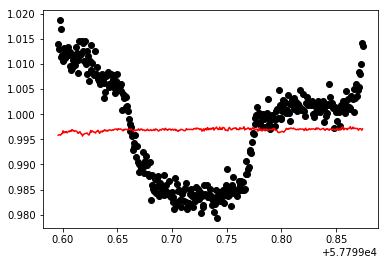

In [35]:
plt.plot(t, f, 'ko', t, loglike(res.x, t, f, p, fwhm, xcenter, ycenter, ret_full=True), 'r-')

## Maximum A Priori Estimation

In [36]:
def logprob(theta, t, f, p, fwhm, xcenter, ycenter, up=None):

    k,tc,a,i,u1,u2,ls,k0,k1,k2,k3,k4 = theta

    if u1 < 0 or u1 > 2 or u2 < -1 or u2 > 1 or k < 0 or k > 1 or i > np.pi/2:
        return -np.inf

    lp = 0
    if up is not None:
        lp += np.log(stats.norm.pdf(u1, loc=up[0], scale=up[1]))
        lp += np.log(stats.norm.pdf(u2, loc=up[2], scale=up[3]))

    ll = loglike(theta, t, f, p, fwhm, xcenter, ycenter)

    if np.isnan(ll).any():
        return -np.inf
    
    return lp + ll


nlp = lambda *x: -logprob(*x)

print ("NLP before: {}".format(nlp(theta, t, f, p, fwhm, xcenter, ycenter)))
res = op.minimize(nlp, theta, args=(t, p, f, fwhm, xcenter, ycenter), method='nelder-mead')
print ("NLP after: {}".format(nlp(res.x, t, f, p, fwhm, xcenter, ycenter)))

NLP before: -1654.59605267996
NLP after: 2072868884.2578607


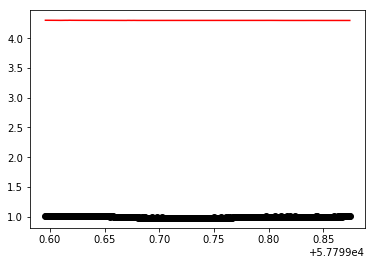

In [37]:
plt.plot(t, f, 'ko', t, loglike(res.x, t, f, p, fwhm, xcenter, ycenter, ret_full=True), 'r-')

## MCMC

In [39]:
from emcee import MHSampler, EnsembleSampler
from emcee.utils import sample_ball
from tqdm import tqdm

ndim = len(theta)
nwalkers = 8 * ndim if ndim > 12 else 16 * ndim
nsteps1 = 1000

args = t, f, p, fwhm, xcenter, ycenter
sampler = EnsembleSampler(nwalkers, ndim, logprob,
    args=args, threads=1)

pos0 = sample_ball(theta, [1e-4]*ndim, nwalkers)

for pos,_,_ in tqdm(sampler.sample(pos0, iterations=nsteps1)):
    pass

0it [00:00, ?it/s]/home/Jerome/miniconda3/envs/moscatel/lib/python3.6/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/home/Jerome/miniconda3/envs/moscatel/lib/python3.6/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))
1000it [01:41, 11.53it/s]


## Parameter best estimates

In [40]:
for i,j in zip(theta, sampler.flatchain.mean(axis=0)): 
    print(i,j)

0.122474487139 0.125593279612
57799.7350506 57799.719842
13.18482235546915 12.1110473867
1.5707963267948966 1.54967273387
0.4 0.43052630357
0.4 0.277628428661
-4.60467170645 -5.44706232837
0 0.00122393896542
0 -0.00234145416763
0 -0.0012426667366
0 -9.67681335475e-05
0 8.048891687


In [41]:
sampler.flatlnprobability.shape

(192000,)

In [42]:
sampler.flatchain.shape

(192000, 12)

In [43]:
sampler.flatlnprobability.max()

2080.2015187977868

In [44]:
max_idx=np.argmax(sampler.flatlnprobability)

In [45]:
#parameter vector
pv=sampler.flatchain[max_idx]
pv

array([  1.27172367e-01,   5.77997175e+04,   1.05368454e+01,
         1.53087498e+00,   3.00231357e-01,   5.76373314e-01,
        -5.99418486e+00,   9.78930807e-04,  -2.45415591e-03,
        -1.18152744e-03,  -4.95857835e-03,   2.89130564e+02])

## Modelling results

AttributeError: 'numpy.ndarray' object has no attribute 'set_ylim'

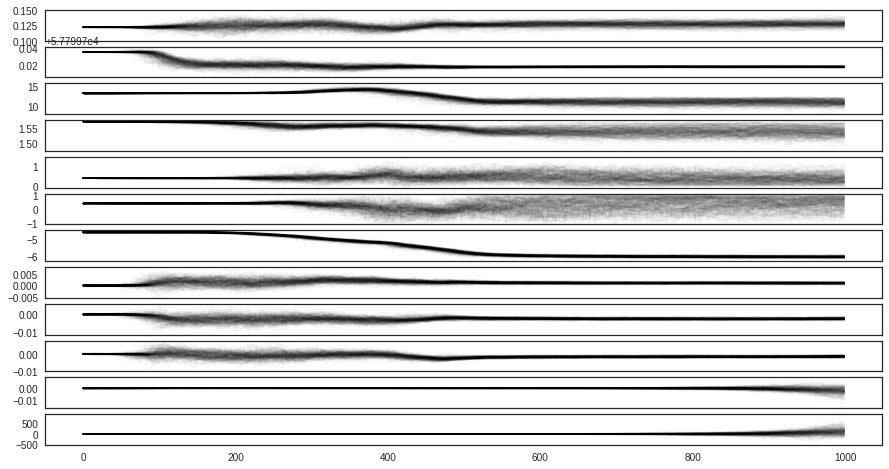

In [47]:
import seaborn as sb

chain = sampler.chain

with sb.axes_style('white'):
    nwalkers, nsteps, ndim = chain.shape
    fig, axs = plt.subplots(ndim, 1, figsize=(15,ndim/1.5), sharex=True)
    [axs.flat[i].plot(c, drawstyle='steps', color='k', alpha=4./nwalkers) for i,c in enumerate(chain.T)]
    #ax.set_ylim()

Monitor the [Gelman-Rubin statistic]() to ensure high quality posterior samples for the chains produced by the MCMC sampler 

* stabilize below a typical value of at most 1.03 up to a maximum of N steps for each of the N walkers
* cull the final chain using the burn-in value of N and thinning by a factor of 10 to account for autocorrelation in samples
* the final flattened chains thus consist of approximately X independent posterior samples

In [48]:
burn = 500

In [49]:
#nwalkers, nsteps, ndim
sampler.chain.shape

(192, 1000, 12)

In [50]:
sampler.chain[:,burn:,:].shape

(192, 500, 12)

In [51]:
sampler.chain[:,burn:,:].reshape(-1, ndim).shape

(96000, 12)

In [52]:
fc=sampler.chain[:,burn:,:].reshape(-1, ndim)

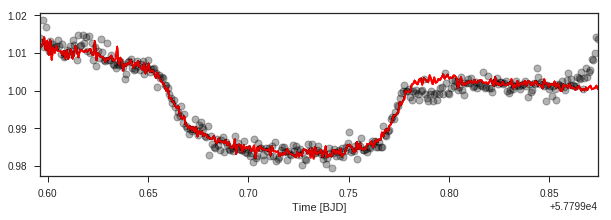

In [53]:
ps = [loglike(pv, t, f, p, fwhm, xcenter, ycenter, ret_full=True) for th in fc[np.random.randint(0, fc.shape[0], size=100)]]

with sb.axes_style('ticks'):
    fig, ax = plt.subplots(1, 1, figsize=(10,3))
    ax.plot(t, f, linestyle='none', marker='o',
        color='k', alpha=0.3, mew=1, mec='k')
    for s in ps:
        ax.plot(t, s, 'r-', alpha=0.03)
    plt.setp(ax, xlabel='Time [BJD]',
        xlim=(t.min(), t.max()))

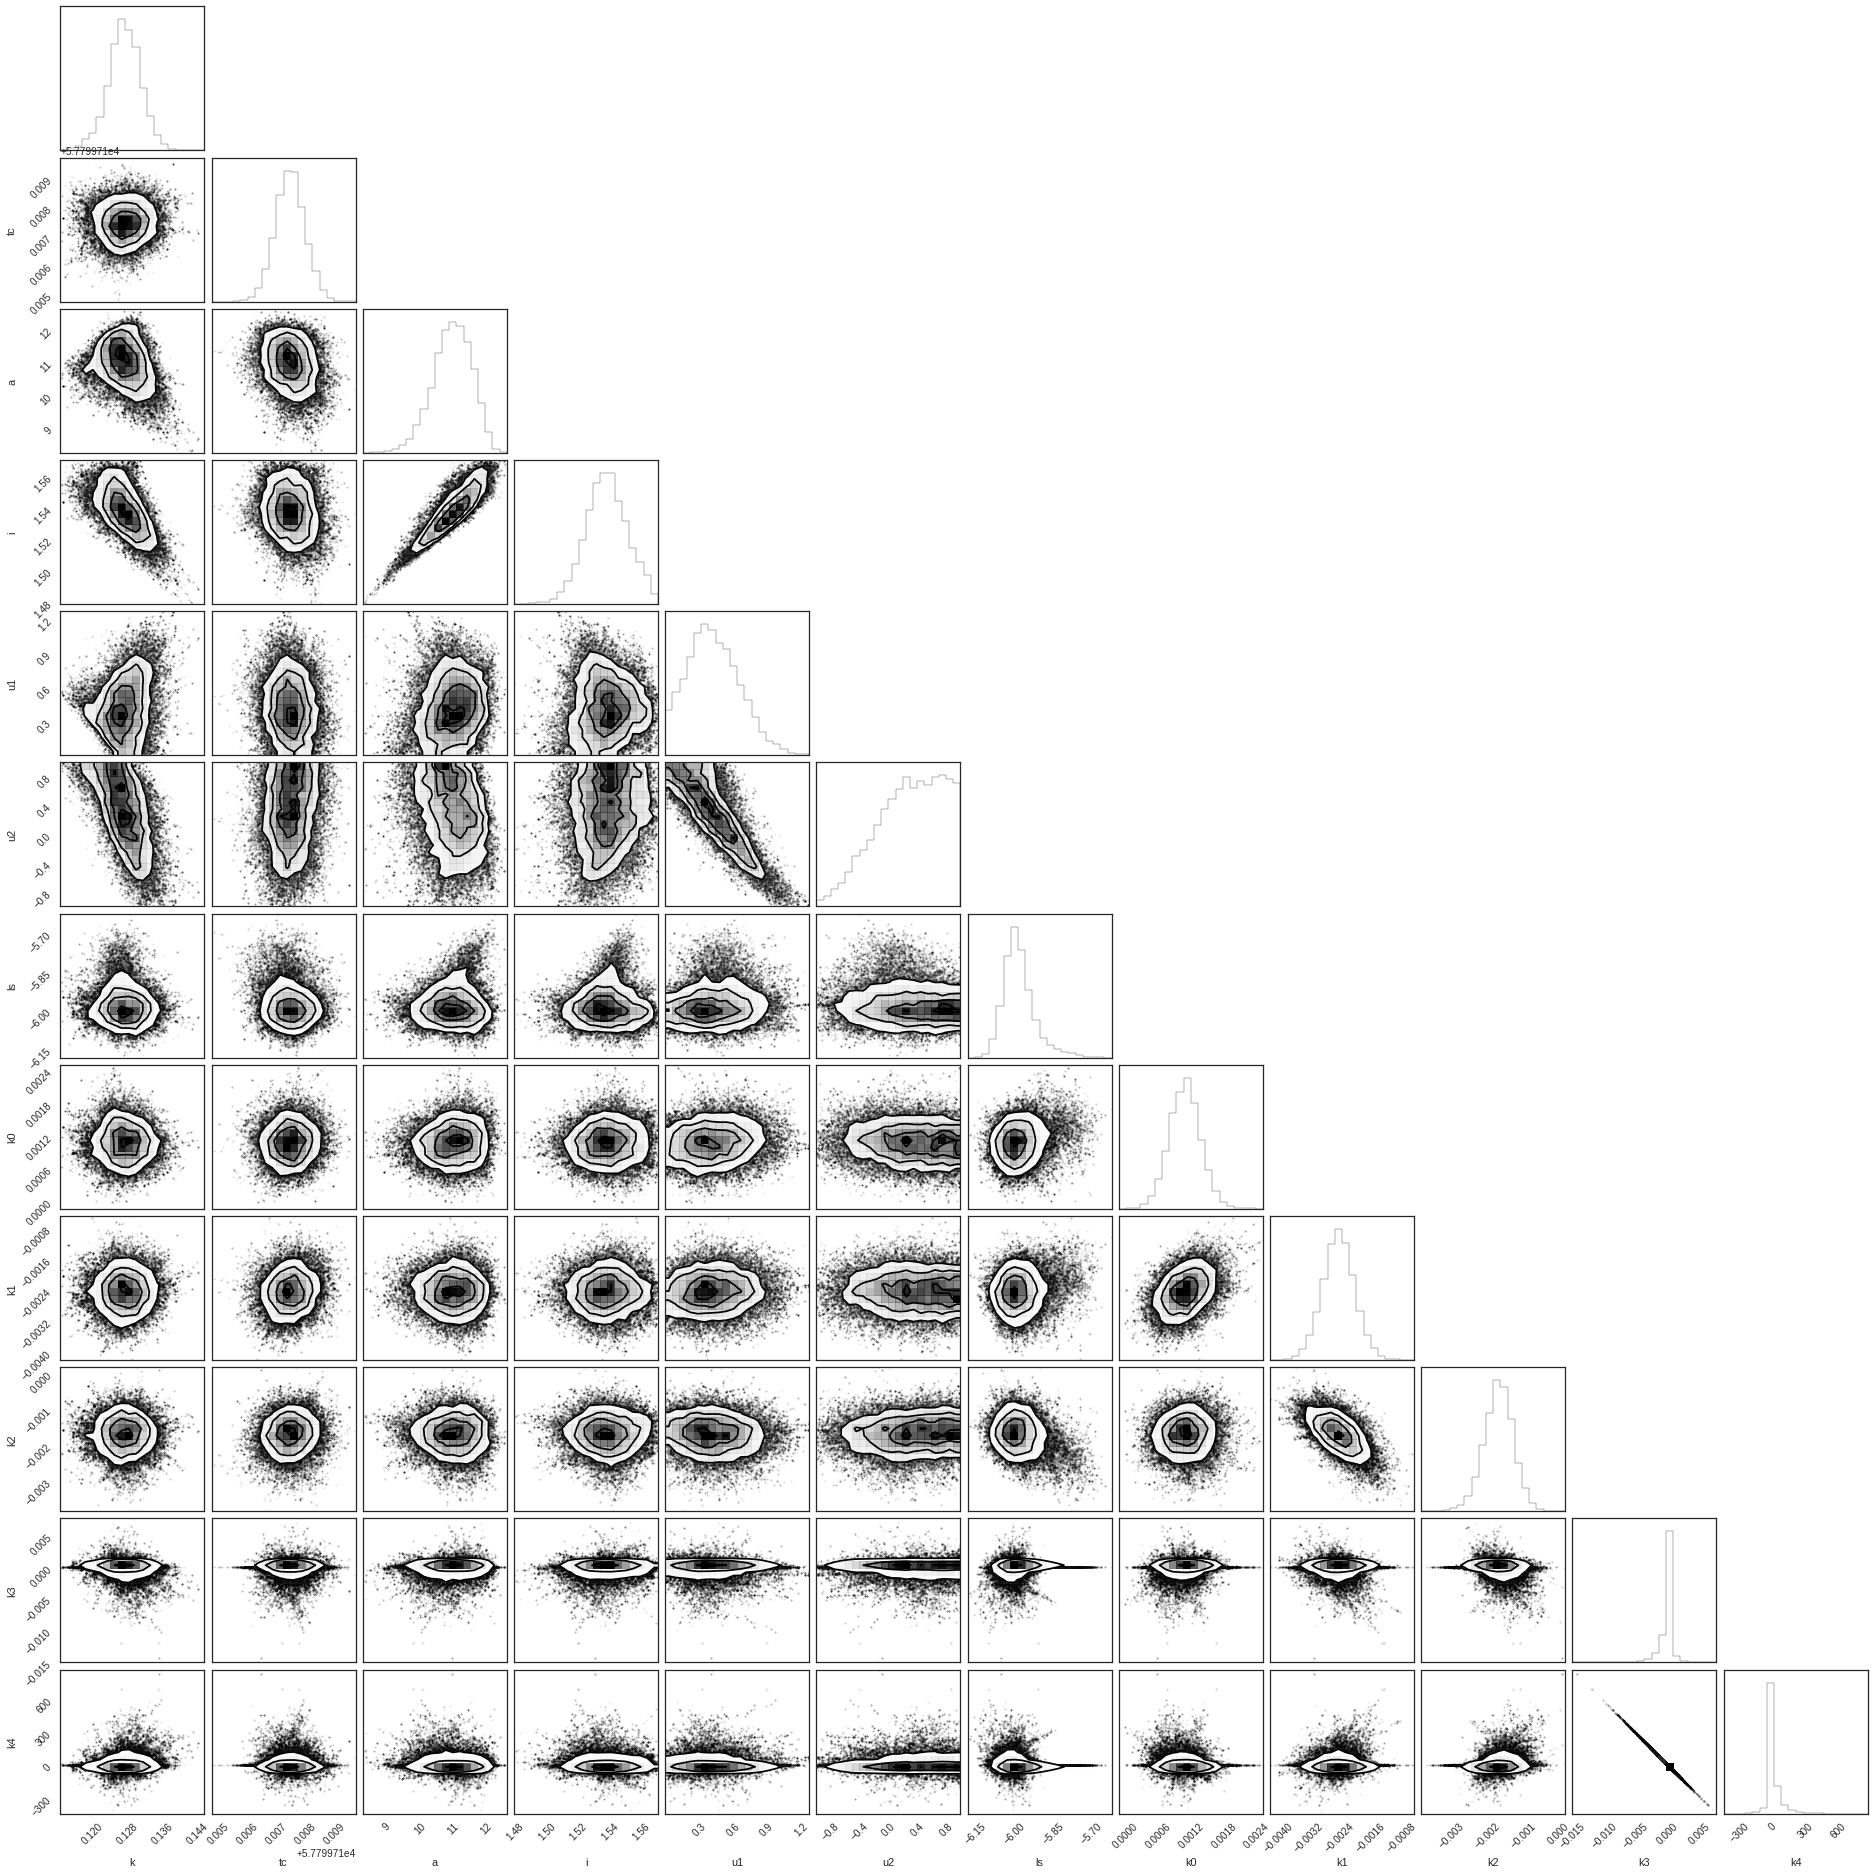

In [55]:
import corner
with sb.axes_style('white'):
    corner.corner(fc, labels='k,tc,a,i,u1,u2,ls,k0,k1,k2,k3,k4'.split(','), fontsize=20)

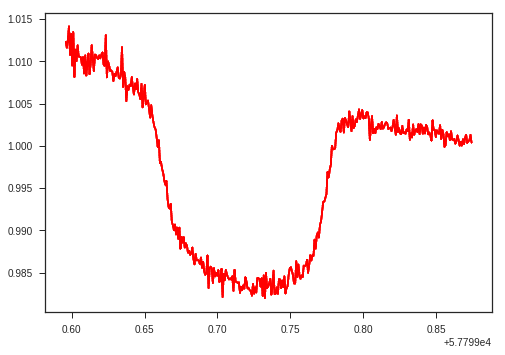

In [56]:
import seaborn as sb
#modeling+systematics
with sb.axes_style('ticks'):
    for s in ps:
        plt.plot(t, s, 'r-', alpha=0.03)

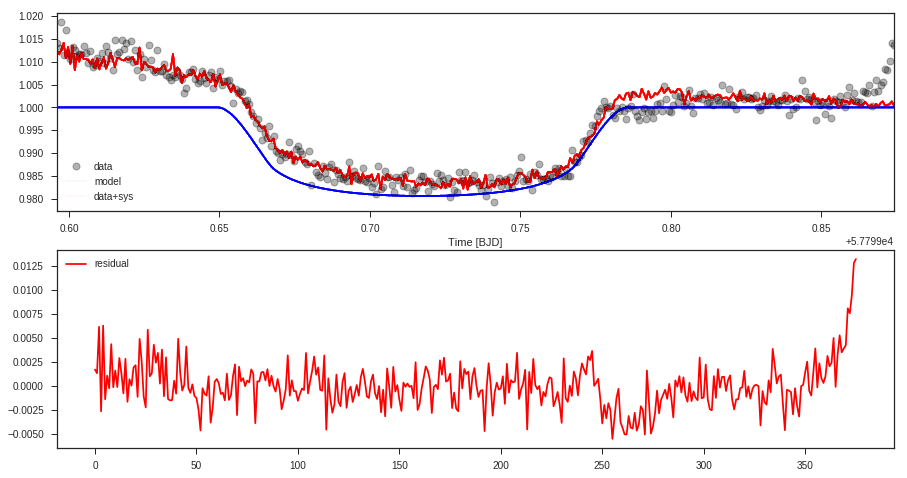

In [57]:
with sb.axes_style('ticks'):
    fig, ax = plt.subplots(2, 1, figsize=(15,8))
    #data
    ax[0].plot(t, f, linestyle='none', marker='o',
        color='k', alpha=0.3, mew=1, mec='k')
    for s in ps:
        #model
        ax[0].plot(t, loglike(pv, t, f, p, fwhm, xcenter, ycenter, ret_mod=True), 
                   'b-', alpha=0.03) 
        #model+systematics
        ax[0].plot(t, s, 'r-', alpha=0.03)
    #residual
    res = loglike(pv, t, f, p, fwhm, xcenter, ycenter, ret_full=True)
    ax[1].plot(f-res, 'r-', label='residual')
    plt.setp(ax[0], xlabel='Time [BJD]',
        xlim=(t.min(), t.max()))
ax[0].legend(['data','model','data+sys'], loc='lower left')
ax[1].legend(loc='best')

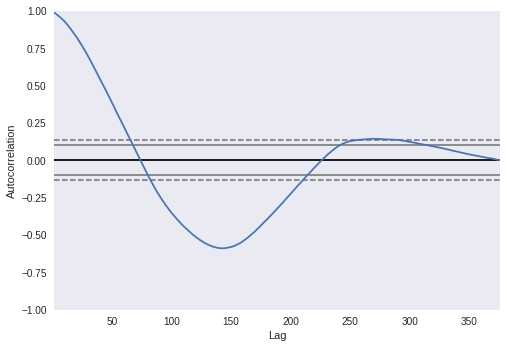

In [58]:
from pandas.tools.plotting import autocorrelation_plot

plt.figure()
autocorrelation_plot(res)

## To Do:

* fwhm
* peak flux within aperture of brightest star